## Creator: Linda Nguyen 

# PREDICT SURVIVAL OF PATIENTS WITH HEART FAILURE

# STEP 1: RETRIEVING AND PREPARING DATA 

In [2]:
#load packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
pip install plotly==5.7.0 

Note: you may need to restart the kernel to use updated packages.


In [4]:
import plotly.express as px
import plotly.graph_objects as go

In [5]:
df= pd.read_csv('heart_failure.csv', sep=',',header=0)

In [6]:
#remane of some long column headers
df = df.rename({"creatinine_phosphokinase":"CPK","DEATH_EVENT":"death"}, axis='columns')

In [7]:
df.columns

Index(['age', 'anaemia', 'CPK', 'diabetes', 'ejection_fraction',
       'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium',
       'sex', 'smoking', 'time', 'death'],
      dtype='object')

In [8]:
#check msiiing values
df.isnull().sum()

age                    0
anaemia                0
CPK                    0
diabetes               0
ejection_fraction      0
high_blood_pressure    0
platelets              0
serum_creatinine       0
serum_sodium           0
sex                    0
smoking                0
time                   0
death                  0
dtype: int64

In [9]:
#check data infomation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  299 non-null    float64
 1   anaemia              299 non-null    int64  
 2   CPK                  299 non-null    int64  
 3   diabetes             299 non-null    int64  
 4   ejection_fraction    299 non-null    int64  
 5   high_blood_pressure  299 non-null    int64  
 6   platelets            299 non-null    float64
 7   serum_creatinine     299 non-null    float64
 8   serum_sodium         299 non-null    int64  
 9   sex                  299 non-null    int64  
 10  smoking              299 non-null    int64  
 11  time                 299 non-null    int64  
 12  death                299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [10]:
# count values of some variables

print(df.death.value_counts())

print(df.sex.value_counts())

print(df.smoking.value_counts())

0    203
1     96
Name: death, dtype: int64
1    194
0    105
Name: sex, dtype: int64
0    203
1     96
Name: smoking, dtype: int64


In [11]:
#check if each record is unique 
df.set_index(['age', 'anaemia', 'CPK', 'diabetes', 'ejection_fraction',
       'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium',
       'sex', 'smoking', 'time', 'death']).index.is_unique

True

In [12]:
#convert data type
df['anaemia'] = df.anaemia.astype('boolean')

df['diabetes'] = df.diabetes.astype('boolean')

df['high_blood_pressure'] = df['high_blood_pressure'].astype('boolean')

df['smoking'] = df.smoking.astype('boolean')

df['age']= df.age.astype(int)

df['sex'] = df.anaemia.astype('category')  # 
df.dtypes 

age                       int32
anaemia                 boolean
CPK                       int64
diabetes                boolean
ejection_fraction         int64
high_blood_pressure     boolean
platelets               float64
serum_creatinine        float64
serum_sodium              int64
sex                    category
smoking                 boolean
time                      int64
death                     int64
dtype: object

In [13]:
#remove whitespaces from the entire df 
for col in df.select_dtypes('object'):
    df[col] = df[col].str.strip()

In [14]:
# print all variables
df.columns

Index(['age', 'anaemia', 'CPK', 'diabetes', 'ejection_fraction',
       'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium',
       'sex', 'smoking', 'time', 'death'],
      dtype='object')

In [15]:
#show the five first rows of df
df.head(5)

,age,anaemia,CPK,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75,False,582,False,20,True,265000.00,1.9,130,False,False,4,1
1,55,False,7861,False,38,False,263358.03,1.1,136,False,False,6,1
2,65,False,146,False,20,False,162000.00,1.3,129,False,True,7,1
3,50,True,111,False,20,False,210000.00,1.9,137,True,False,7,1
4,65,True,160,True,20,False,327000.00,2.7,116,True,False,8,1


# STEP 2: DATA EXPLORATION

# 2.1 Explore single variables

0    203
1     96
Name: death, dtype: int64


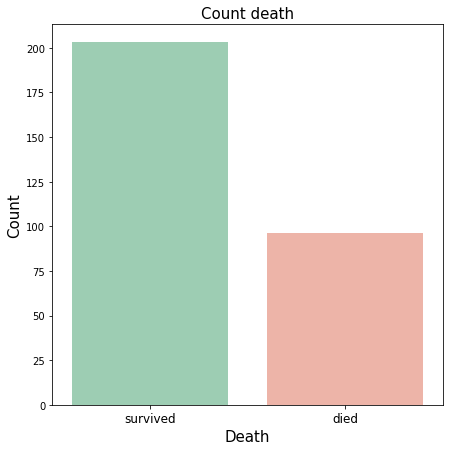

In [16]:
#Count death and survival 
print(df.death.value_counts())

plt.figure(figsize=(7,7))
anaemia = sns.countplot(x=df.death,palette=["#95d5b2","#f8ad9d"])
anaemia.set_title("Count death", fontsize=15)
anaemia.set_xticklabels(['survived', 'died'], fontsize=12)
anaemia.set_xlabel('Death', size=15)
anaemia.set_ylabel('Count', size=15)

plt.show()

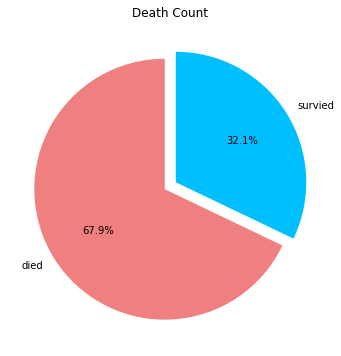

In [17]:
#died and survived percentage
colors = ['lightcoral','deepskyblue',
          'orchid',    'tomato',
          'teal',      'darkcyan',
          'limegreen', 'darkorange']
plt.figure(figsize=(10, 6))
labels=['died','survied']
plt.pie(df['death'].value_counts(),labels=labels,colors=colors,startangle=90, autopct='%1.1f%%',explode=[0.05,0.05])
plt.title('Death Count')
plt.show()

False    170
True     129
Name: sex, dtype: int64


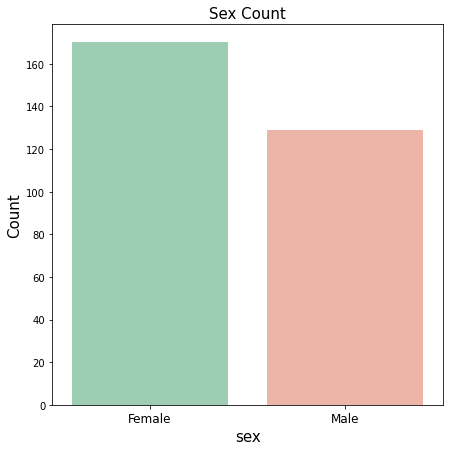

In [18]:
#Sex count 
print(df.sex.value_counts())

plt.figure(figsize=(7,7))
anaemia = sns.countplot(x=df.sex,palette=["#95d5b2","#f8ad9d"])
anaemia.set_title("Sex Count", fontsize=15)
anaemia.set_xticklabels(['Female', 'Male'], fontsize=12)
anaemia.set_xlabel('sex', size=15)
anaemia.set_ylabel('Count', size=15)

plt.show()

False    170
True     129
Name: anaemia, dtype: Int64


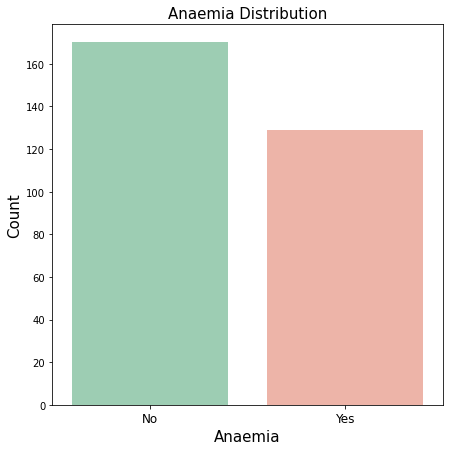

In [19]:
#Visualise numbers of death and survival with Anaemia
print(df.anaemia.value_counts())

plt.figure(figsize=(7,7))
anaemia = sns.countplot(x=df.anaemia,palette=["#95d5b2","#f8ad9d"])
anaemia.set_title("Anaemia Distribution", fontsize=15)
anaemia.set_xticklabels(['No', 'Yes'], fontsize=12)
anaemia.set_xlabel('Anaemia', size=15)
anaemia.set_ylabel('Count', size=15)

plt.show()

False    174
True     125
Name: diabetes, dtype: Int64


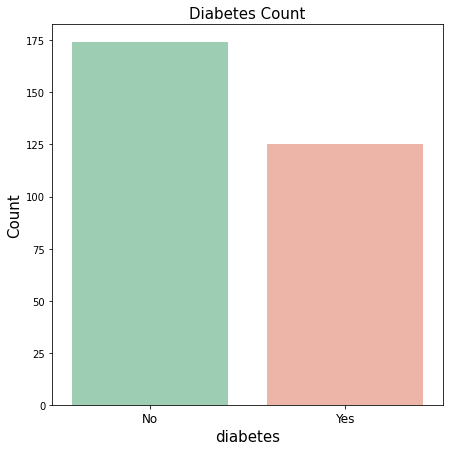

In [20]:
#Visualise numbers of death and survival with Diabetes
print(df.diabetes.value_counts())

plt.figure(figsize=(7,7))
diabetes = sns.countplot(x=df.diabetes,palette=["#95d5b2","#f8ad9d"])
diabetes.set_title("Diabetes Count", fontsize=15)
diabetes.set_xticklabels(['No', 'Yes'], fontsize=12)
diabetes.set_xlabel('diabetes', size=15)
diabetes.set_ylabel('Count', size=15)

plt.show()

False    203
True      96
Name: smoking, dtype: Int64


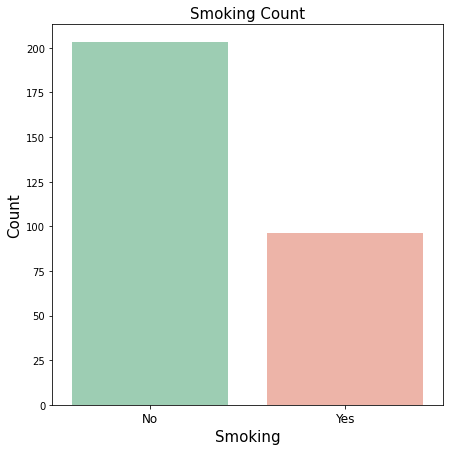

In [21]:
#Visualise numbers of death and survivals Smooking

print(df.smoking.value_counts())

plt.figure(figsize=(7,7))
smoking = sns.countplot(x=df.smoking,palette=["#95d5b2","#f8ad9d"])
smoking.set_title("Smoking Count", fontsize=15)
smoking.set_xticklabels(['No', 'Yes'], fontsize=12)
smoking.set_xlabel('Smoking', size=15)
smoking.set_ylabel('Count', size=15)

plt.show()

False    194
True     105
Name: high_blood_pressure, dtype: Int64


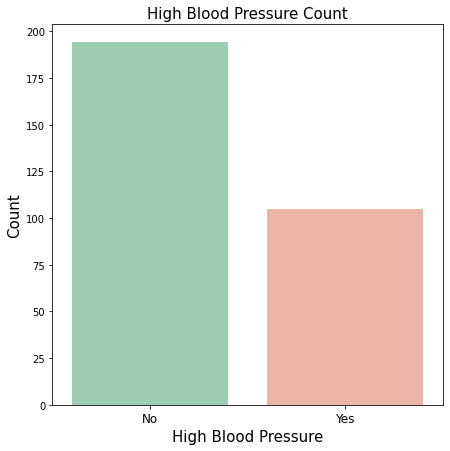

In [22]:
#Visualise numbers of death and survivals High Blood pressure
print(df.high_blood_pressure.value_counts())
plt.figure(figsize=(7,7))
high_blood_pressure = sns.countplot(x=df.high_blood_pressure,palette=["#95d5b2","#f8ad9d"])
high_blood_pressure.set_title("High Blood Pressure Count", fontsize=15)
high_blood_pressure.set_xticklabels(['No', 'Yes'], fontsize=12)
high_blood_pressure.set_xlabel('High Blood Pressure', size=15)
high_blood_pressure.set_ylabel('Count', size=15)

plt.show()

False    170
True     129
Name: anaemia, dtype: Int64


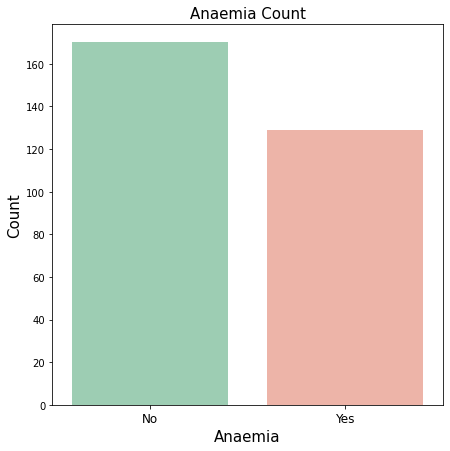

In [23]:
#Visualise numbers of death and survivals High Blood pressure
print(df.anaemia.value_counts())
plt.figure(figsize=(7,7))
high_blood_pressure = sns.countplot(x=df.anaemia,palette=["#95d5b2","#f8ad9d"])
high_blood_pressure.set_title("Anaemia Count", fontsize=15)
high_blood_pressure.set_xticklabels(['No', 'Yes'], fontsize=12)
high_blood_pressure.set_xlabel('Anaemia', size=15)
high_blood_pressure.set_ylabel('Count', size=15)

plt.show()

In [24]:
#descriptive statistical for numeric variables
df.describe()

,age,anaemia,CPK,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,time,death
count,299.000000,299,299.000000,299,299.000000,299,299.000000,299.00000,299.000000,299,299.000000,299.00000
unique,NaN,2,NaN,2,NaN,2,NaN,NaN,NaN,2,NaN,NaN
top,NaN,False,NaN,False,NaN,False,NaN,NaN,NaN,False,NaN,NaN
freq,NaN,170,NaN,174,NaN,194,NaN,NaN,NaN,203,NaN,NaN
mean,60.829431,NaN,581.839465,NaN,38.083612,NaN,263358.029264,1.39388,136.625418,NaN,130.260870,0.32107
std,11.894997,NaN,970.287881,NaN,11.834841,NaN,97804.236869,1.03451,4.412477,NaN,77.614208,0.46767
min,40.000000,NaN,23.000000,NaN,14.000000,NaN,25100.000000,0.50000,113.000000,NaN,4.000000,0.00000
25%,51.000000,NaN,116.500000,NaN,30.000000,NaN,212500.000000,0.90000,134.000000,NaN,73.000000,0.00000
50%,60.000000,NaN,250.000000,NaN,38.000000,NaN,262000.000000,1.10000,137.000000,NaN,115.000000,0.00000
75%,70.000000,NaN,582.000000,NaN,45.000000,NaN,303500.000000,1.40000,140.000000,NaN,203.000000,1.00000


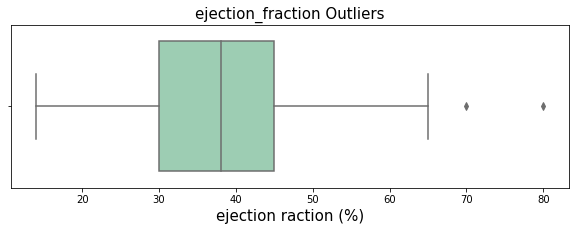

In [25]:
#distribution and outliers of ejection_fraction
plt.figure(figsize=(10,3))
ejection_fraction= sns.boxplot(x=df.ejection_fraction,color='#95d5b2')
ejection_fraction.set_title('ejection_fraction Outliers', fontsize=15)
ejection_fraction.set_xlabel('ejection raction (%)', size=15)
plt.show()

There are 2 outliers in ejection fraction. We need to remove them because they are unmeaningful values. 

In [26]:
#remove outliers of ejection_fractions
df=df[df['ejection_fraction']<70]

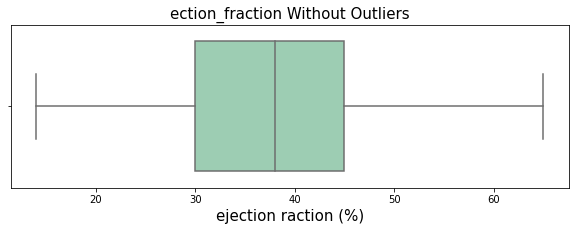

In [27]:
# ejection_fraction without outliers
plt.figure(figsize=(10,3))
ejection_fraction= sns.boxplot(x=df.ejection_fraction, color='#95d5b2')
ejection_fraction.set_title('ection_fraction Without Outliers', fontsize=15)
ejection_fraction.set_xlabel('ejection raction (%)', size=15)
plt.show()

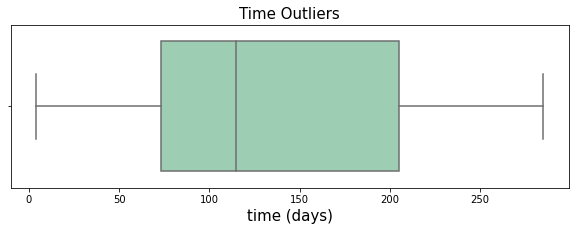

In [28]:
#distribution and outliers of time
plt.figure(figsize=(10,3))
ejection_fraction= sns.boxplot(x=df.time, color='#95d5b2')
ejection_fraction.set_title('Time Outliers', fontsize=15)
ejection_fraction.set_xlabel('time (days)', size=15)
plt.show()

Time has no outliers. 

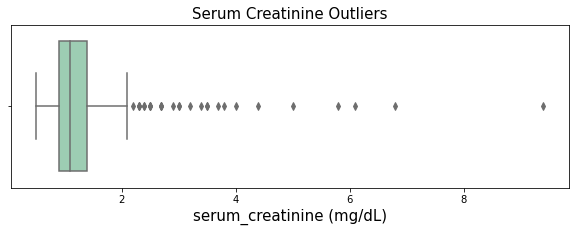

In [29]:
#distribution and outliers of serum_creatinine
plt.figure(figsize=(10,3))
ejection_fraction= sns.boxplot(x=df.serum_creatinine, color='#95d5b2')
ejection_fraction.set_title('Serum Creatinine Outliers', fontsize=15)
ejection_fraction.set_xlabel('serum_creatinine (mg/dL)', size=15)
plt.show()

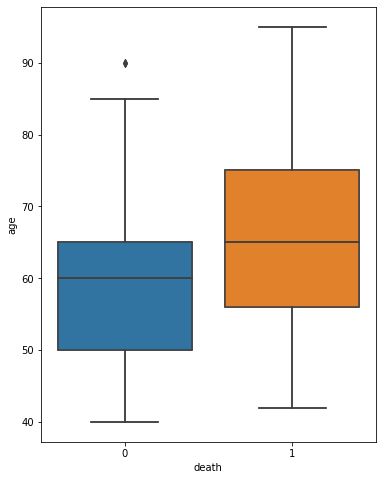

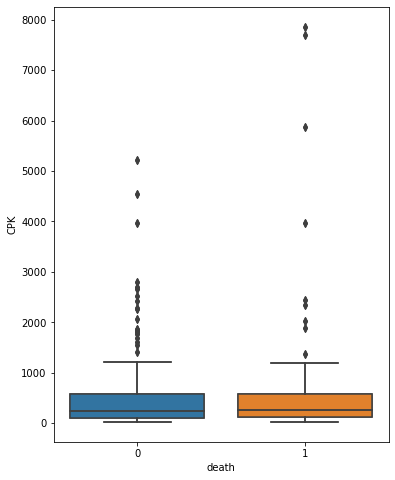

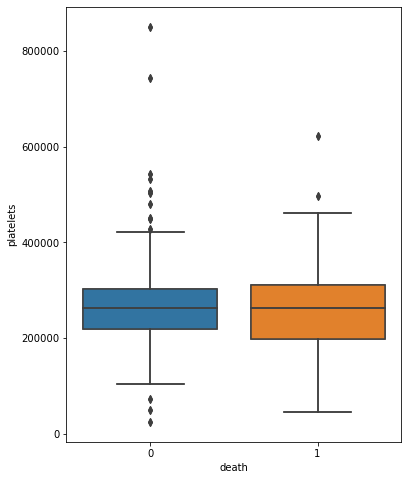

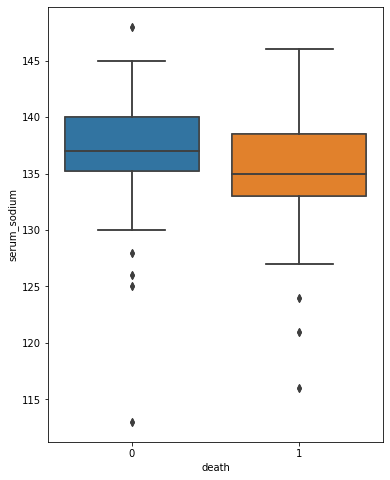

In [30]:
# check outliers of other non-binary variables
feature = ["age","CPK","platelets","serum_sodium"]
for i in feature:
    plt.figure(figsize=(6,8))
    sns.boxplot(x=df.death, y=df[i])
    sns.boxplot(x=df.death, y=df[i])
    plt.show()

The outliers in these boxplot are actually not outliers because they are possible values in real life. They can be useful to predict heart failure. Therefore, we don't need to replace or remove them. 

# 2.2 Explore pair relationship

In this project, we aim to predict death event using other features. Therefore, we'll focus on exploring the relationship between death and other features.

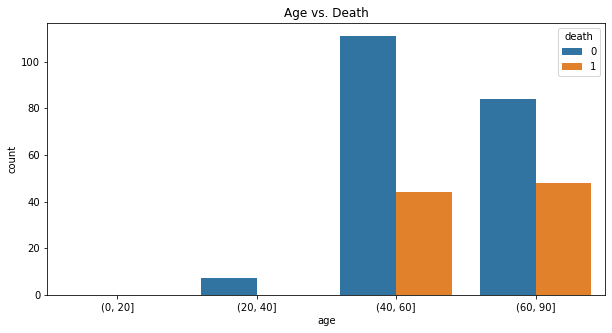

In [31]:
#age vs death
plt.figure(figsize=(10,5))
bins=[0,20,40,60,90]
sns.countplot(x=pd.cut(df.age,bins=bins),hue=df.death).set (title='Age vs. Death')
plt.show()

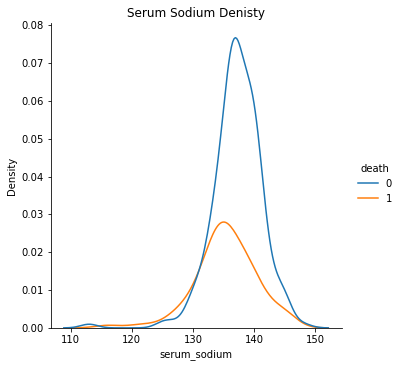

In [32]:
#serun_sodium vs death
ss= sns.displot(data=df, x="serum_sodium",hue='death', kind='kde')
plt.title("Serum Sodium Denisty")
plt.show()

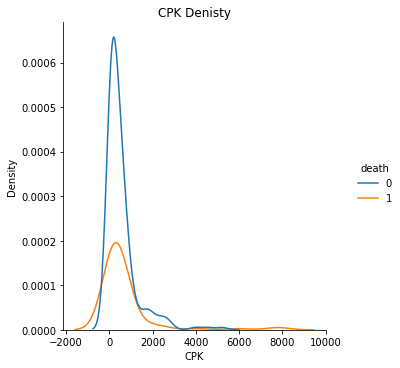

In [33]:
#CPK vs death
cpk= sns.displot(data=df, x="CPK",hue='death', kind='kde')
plt.title("CPK Denisty")
plt.show()

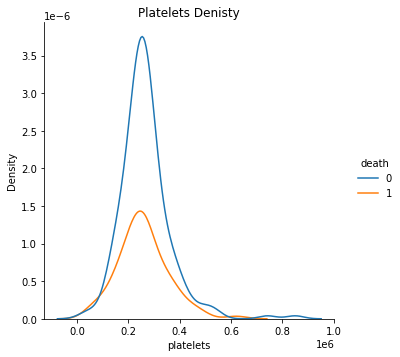

In [34]:
#Plateles vs death
pla= sns.displot(data=df, x="platelets",hue='death', kind='kde')
plt.title("Platelets Denisty")
plt.show()

In [111]:
#ejection_fration vs death
fig = px.histogram(df,x="ejection_fraction", color="death", marginal="box", hover_data=df.columns, 
                   title ="Ejection Fration vs Death",
                   template="simple_white",
                   labels={"ejection_fraction": "ejection_fraction (%)"})
#change label names
newnames = {'1': "died", '0': "survived"}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])))
fig.show()

In [36]:
#time vs death
fig = px.histogram(df,x="time", color="death", marginal="box", hover_data=df.columns, 
                   title ="Time vs Death",
                   template="simple_white",
                 labels={"time": "time (days)"})
#change label names
newnames = {'1': "died", '0': "survived"}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])))
fig.show()

In [37]:
#serum creatinine vs death
fig = px.histogram(df,x="serum_creatinine", color="death", marginal="box", hover_data=df.columns, 
                   title ="Distribution of Serum Creatinine vs Death",
                   template="simple_white")

#change the label names
newnames = {'1': "died", '0': "survived"}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])))
                           
fig.show()

In [38]:
#serum_sodium vs death
fig = px.histogram(df,x="serum_sodium", color="death", marginal="box", hover_data=df.columns, 
                   title ="Serum Sodium vs Death",
                   template="simple_white")
#change label names
newnames = {'1': "died", '0': "survived"}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])))
fig.show()

In [39]:
#age vs death
fig = px.histogram(df,x="age", color="death", marginal="box", hover_data=df.columns, 
                   title ="Age vs Death",
                   template="simple_white")
#change label names
newnames = {'1': "died", '0': "survived"}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])))
fig.show()

In [40]:
#diabetes vs death
fig = px.histogram(df,x="diabetes", color="death", width= 400, height=400,text_auto=True,
                   title ="Death by diabetes", 
                   template="simple_white")
#change label names
newnames = {'1': "died", '0': "survived"}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])))
                   
                  
fig.show()

In [41]:
#high blood pressure vs death
fig = px.histogram(df,x="high_blood_pressure", color="death", width= 400, height=400,text_auto=True,
                   title ="Death by High Blood Pressure", 
                   template="simple_white") 
#change label names
newnames = {'1': "died", '0': "survived"}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])))
fig.show()

In [42]:
#smoking vs death
fig = px.histogram(df,x="smoking", color="death", width= 400, height=400,text_auto=True,
                   title ="Death by smoking", 
                   template="simple_white") 
#change label names
newnames = {'1': "died", '0': "survived"}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])))
fig.show()

In [43]:
df.columns

Index(['age', 'anaemia', 'CPK', 'diabetes', 'ejection_fraction',
       'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium',
       'sex', 'smoking', 'time', 'death'],
      dtype='object')

In [44]:
#death vs anaemia
fig = px.histogram(df,x="anaemia", color="death", width= 400, height=400,text_auto=True,
                   title ="Death by anaemia", 
                   template="simple_white") 
#change label names
newnames = {'1': "died", '0': "survived"}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])))
fig.show()

# 2.3. Correlation

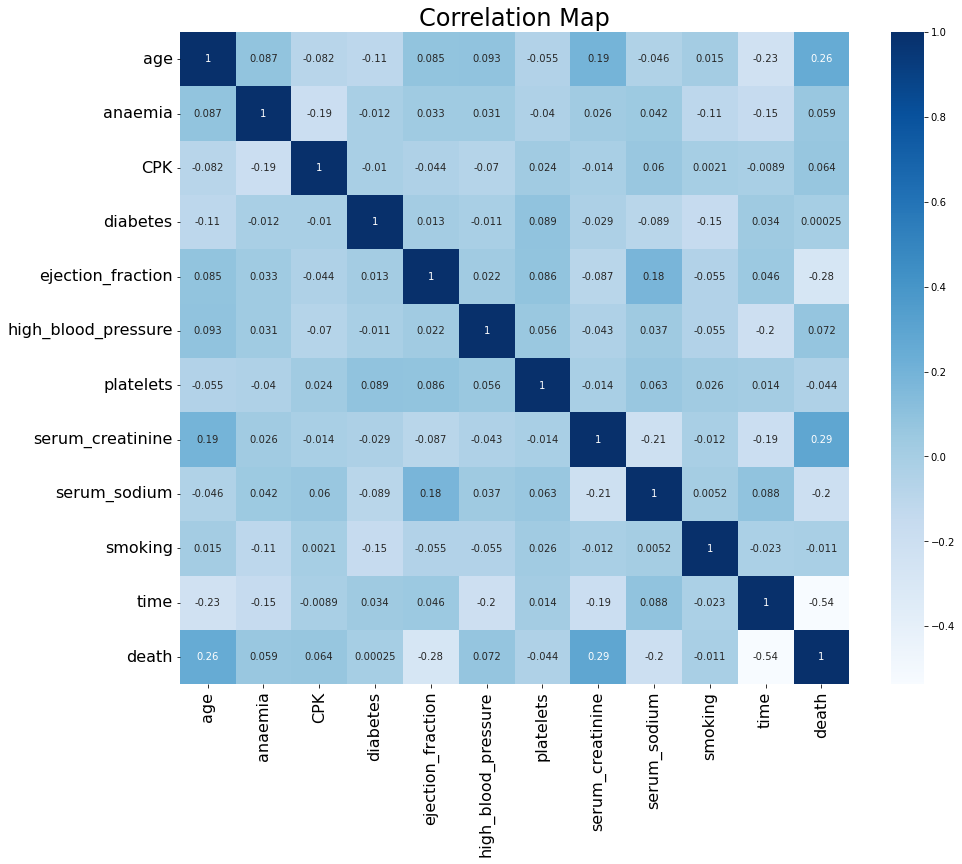

In [45]:
#plot correlation map for whole df
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.title("Correlation Map", fontsize=24)
plt.tick_params(axis='both', labelsize=16)
plt.show()

# STEP 3: DATA MODELING

# 3.1. Feature importance

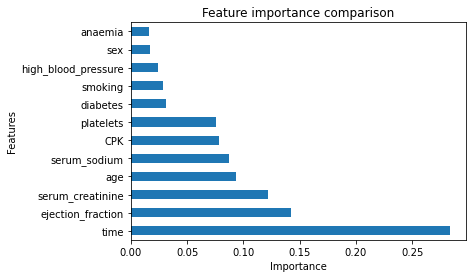

In [46]:
from sklearn.ensemble import ExtraTreesClassifier

#separate dependent  and independent variable
y = df['death']
x = df.drop('death', axis = 1)

#build model
feature_selection_model = ExtraTreesClassifier()

#train model
feature_selection_model.fit(x,y)

#computing each feature importance
feature_importance= feature_selection_model.feature_importances_

feature_importance = pd.Series(feature_selection_model.feature_importances_, index=x.columns)

data= feature_importance.nlargest(12)

#plot the data
data.plot(kind='barh')
plt.title('Feature importance comparison')
plt.xlabel('Importance')
plt.ylabel('Features')

plt.show()


The results clearly shows that time, ejection_fraction and serum_creatinine, serum sodium and age are the most important features. Therefore, we will use these five features to modelling on next steps.  

# 3.2 K-Nearest Neighbours using all 11 features

Firstly, let's build a model predict on the whole dataset of 11 features to see how bad the accuracy is. Then later we can do a comparation with models predicted on only 3 important features. 

In [47]:
#separate dependent and independent variables
x= df[['age', 'anaemia', 'CPK', 'diabetes', 'ejection_fraction',
       'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium',
       'sex', 'smoking', 'time']]
y=df.death

In [48]:
#Train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state =0)

In [49]:
x_train.shape

(207, 12)

In [50]:
x_test.shape

(90, 12)

In [51]:
y_train.shape

(207,)

In [52]:
y_test.shape

(90,)

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
#select classifier
clf = KNeighborsClassifier(5)

In [108]:
# #fit the data
fit = clf.fit(x_train, y_train)

In [109]:
##predict on test data
y_pre = fit.predict(x_test)
y_pre

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
#measure confusion matrix
cm = confusion_matrix(y_test, y_pre)
print(cm)

[[52 13]
 [19  6]]


In [59]:
from sklearn.metrics import classification_report

In [60]:
#generate classification report
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        65
           1       0.32      0.24      0.27        25

    accuracy                           0.64        90
   macro avg       0.52      0.52      0.52        90
weighted avg       0.62      0.64      0.63        90



In [110]:
#convert accurasy to percentage
knn_accuracy_11_features= round(clf.score(x_test, y_test),2) *100
print(knn_accuracy_11_features)

85.0


This model obtained only 64% accuracy.

# 3.3.  Classification modelling using three important features

# 3.3.1.Train Test Split

In [62]:
#separate dependent and independent variables
x = df[['time','ejection_fraction','serum_creatinine']].values
y = df['death'].values

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state =0)

In [64]:
x_train.shape

(207, 3)

In [65]:
x_test.shape

(90, 3)

In [66]:
y_train.shape

(207,)

In [67]:
y_test.shape

(90,)

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

# tensorflow lib
#import tensorflow as tf
# from keras.layers import Dense,Dropout
# from keras.models import Sequential

from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

import warnings
warnings.simplefilter(action='ignore')


In [69]:

print("Model Name : RandomForest")

model_rf = make_pipeline(preprocessing.StandardScaler(),RandomForestClassifier(n_estimators=50,max_depth=6, min_samples_leaf=9,
                                             min_samples_split=16, random_state=42))
fit = model_rf.fit(x_train, y_train)
y_pre = fit.predict(x_test)
y_pre
cm = confusion_matrix(y_test, y_pre)
print(cm)
print(classification_report(y_test,y_pre))

Model Name : RandomForest
[[61  4]
 [ 2 23]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        65
           1       0.85      0.92      0.88        25

    accuracy                           0.93        90
   macro avg       0.91      0.93      0.92        90
weighted avg       0.94      0.93      0.93        90



# 3.3.2. K-Nearest Neighbors Classifier 

# Modelling

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
#select classifier
clf = KNeighborsClassifier(5) 

In [72]:
#fit the data
fit = clf.fit(x_train, y_train)

In [73]:
#predict on test data
y_pre = fit.predict(x_test)
y_pre

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0], dtype=int64)

In [74]:
y_pre.shape

(90,)

In [75]:
from sklearn.metrics import confusion_matrix

In [76]:
#measure confusion matrix
cm = confusion_matrix(y_test, y_pre)
print(cm)

[[63  2]
 [ 6 19]]


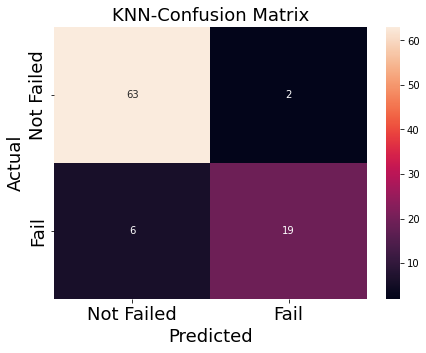

In [77]:
#plot confusion matrix
plt.figure(figsize=(7,5))
plot=sns.heatmap(cm, annot=True)
plt.title("KNN-Confusion Matrix",fontsize=18)
plot.xaxis.set_ticklabels(["Not Failed","Fail"],fontsize=18)
plot.yaxis.set_ticklabels(["Not Failed","Fail"],fontsize=18)
plt.xlabel('Predicted',fontsize=18)
plt.ylabel('Actual',fontsize=18)
plt.show()

In [78]:
from sklearn.metrics import classification_report

In [79]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        65
           1       0.90      0.76      0.83        25

    accuracy                           0.91        90
   macro avg       0.91      0.86      0.88        90
weighted avg       0.91      0.91      0.91        90



In [80]:
#convert accurasy to percentage
knn_accuracy_3_features= round(clf.score(x_test, y_test),2) *100
print(knn_accuracy_3_features)

91.0


# Parameter Tuning Effect KNN

Here, we select different parameters for ‘weights’ and ‘p’:
While we keep n_neighbors = 5, we set weights=distance. Then, let's chechk id we results is improved:


In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
#select classifier
clf = KNeighborsClassifier(5, weights='distance')

In [83]:
#fit data
fit = clf.fit(x_train, y_train)

In [84]:
#predict test data
y_pre = fit.predict(x_test)

In [85]:
#measure confusion matrix
cm = confusion_matrix(y_test, y_pre)

In [86]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        65
           1       0.90      0.72      0.80        25

    accuracy                           0.90        90
   macro avg       0.90      0.84      0.87        90
weighted avg       0.90      0.90      0.90        90



here, we obtained 89% accuracy which lower than the original model.Now let’s further set p value to 1, and we obtain further improved results:

In [87]:
from sklearn.neighbors import KNeighborsClassifier
#select classifier, set p=1
clf = KNeighborsClassifier(5, weights='distance', p=1)

#fit data
fit = clf.fit(x_train, y_train)

#predict test data
y_pre = fit.predict(x_test)

#measure confsuion matrix
cm = confusion_matrix(y_test, y_pre)

#get classification report
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        65
           1       0.90      0.76      0.83        25

    accuracy                           0.91        90
   macro avg       0.91      0.86      0.88        90
weighted avg       0.91      0.91      0.91        90



# K-Folds Cross-Validation for KNN

This step is to evaluate performance and choose classifier parameters for the ahove model

In [88]:
#print the score of the model we trained above with a single train/test split
print("[Train/test split] score: {:.5f}".format(clf.score(x_test, y_test)))

[Train/test split] score: 0.91111


In [89]:
#split the data into k-folds, using each part one time as a test set and the rest for training.
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

In [90]:
for train_index, test_index in kf.split(df):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293
 294 295 296] TEST: [ 0  1  2  3  4  5  6  7

In [91]:
for k, (train_index, test_index) in enumerate(kf.split(df)):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(x_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(x_test, y_test)))

[fold 0] score: 0.65000
[fold 1] score: 0.85000
[fold 2] score: 0.66102
[fold 3] score: 0.79661
[fold 4] score: 0.94915


# 3.3.3.Decision Tree Classifier

# Modelling

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [93]:
#set new_list2 to store rerults of selected features
new_list2 = []

In [94]:
# the loop
for k in range(2,10):
    
    #select classifier
    clf = DecisionTreeClassifier(max_leaf_nodes = k, random_state=0, criterion='entropy')
    
    #fit the data
    fit=clf.fit(x_train, y_train)
   
    #predict on test data
    predicted = clf.predict(x_test)
    
    #try each feature and append results into new_list2
    new_list2.append(accuracy_score(y_test,predicted))

In [95]:
predicted

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [96]:
new_list2

[0.9491525423728814,
 0.8135593220338984,
 0.8135593220338984,
 0.8135593220338984,
 0.8135593220338984,
 0.8135593220338984,
 0.8305084745762712,
 0.8305084745762712]

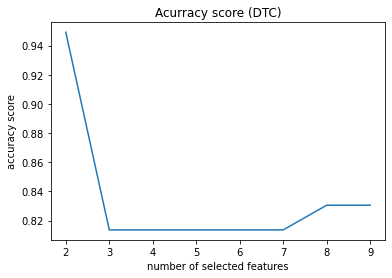

In [97]:
plt.plot(list(range(2,10)), new_list2)
plt.title("Acurracy score (DTC)")
plt.xlabel('number of selected features')
plt.ylabel('accuracy score')
plt.show()

In [98]:
#Measure confusion matrix
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, predicted)
print(cm2)

[[48  8]
 [ 2  1]]


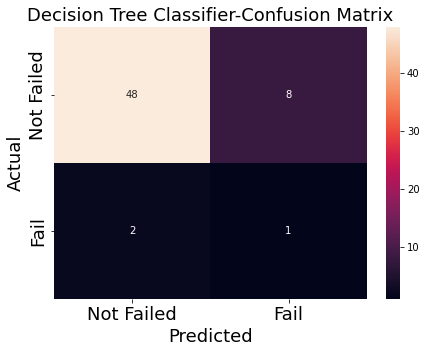

In [99]:
#plot confusion matrix
plt.figure(figsize=(7,5))
plot=sns.heatmap(cm2, annot=True)
plt.title("Decision Tree Classifier-Confusion Matrix",fontsize=18)
plot.xaxis.set_ticklabels(["Not Failed","Fail"],fontsize=18)
plot.yaxis.set_ticklabels(["Not Failed","Fail"],fontsize=18)
plt.xlabel('Predicted',fontsize=18)
plt.ylabel('Actual',fontsize=18)
plt.show()

In [100]:
#Classification precision/recall/f1-sore
from sklearn.metrics import classification_report

print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91        56
           1       0.11      0.33      0.17         3

    accuracy                           0.83        59
   macro avg       0.54      0.60      0.54        59
weighted avg       0.92      0.83      0.87        59



In [101]:
#accuracy in percentage 
dtc_accuracy_3_features= round(clf.score(x_test, y_test),2) *100
print(dtc_accuracy_3_features)

83.0


The model obtained 87% accuracy. Nexy, let's do parameter tunning to check if we can improve the results. 

# K-Fold Cross-Validation for DTC

In [102]:
#print the score of the model we trained above with a single train/test split
print("[Train/test split] score: {:.5f}".format(clf.score(x_test, y_test)))

#split the data into k-folds, using each part one time as a test set and the rest for training.
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

for train_index, test_index in kf.split(df):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    
for k, (train_index, test_index) in enumerate(kf.split(df)):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(x_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(x_test, y_test)))

[Train/test split] score: 0.83051
TRAIN: [ 60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293
 294 295 2

In [103]:
# random forest


# Parameter Tunning Effect using RandomizedSearchCV

In [104]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup dictionary 
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 3),
              "min_samples_leaf": randint(1, 3),
              "criterion": ["gini", "entropy"]}

# classifier data
clf = DecisionTreeClassifier()

# Instantiate
clf_cv = RandomizedSearchCV(clf, param_dist, cv=3)

# Fit the data
print(clf_cv.fit(x,y))

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000280B370E100>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000280B25E8580>})


In [105]:
# best parameters
clf_cv.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 1,
 'min_samples_leaf': 1}

In [106]:
#best score
clf_cv.best_score_

0.6531986531986532

Here, keep running this model to see the highest score it can reach. We can see the best score cannot reach higher the accuracy of the original model. So let's use the results of 87%. 

# 3.4. Compare models

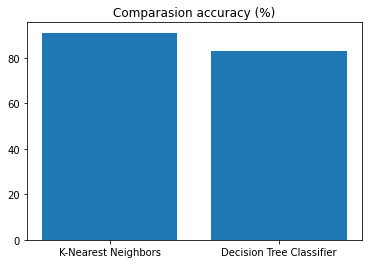

In [107]:
plt.bar(['K-Nearest Neighbors','Decision Tree Classifier'],[knn_accuracy_3_features.max(),dtc_accuracy_3_features.max()])
plt.title("Comparasion accuracy (%)")
plt.show()